In [1]:
from matplotlib import pyplot as plot
import pandas as panda
import seaborn as sns

In [2]:
df = panda.read_csv("Ruter_data.csv", sep=';')

In [3]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [4]:
df.shape

(6000, 17)

C:\Users\Ole\anaconda3\envs\dave3625\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density of vehicles based on capasity')

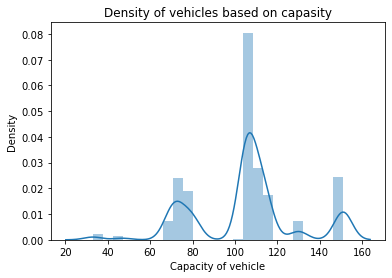

In [5]:
distp = sns.distplot(df.Kjøretøy_Kapasitet, bins=25)
distp.set_xlabel('Capacity of vehicle')
distp.set_title('Density of vehicles based on capasity')

In [6]:
lower_limit, upper_limit = df.Kjøretøy_Kapasitet.quantile([0.01,0.999])
lower_limit, upper_limit
new_df = df[(df.Kjøretøy_Kapasitet>lower_limit)&(df.Kjøretøy_Kapasitet<upper_limit)]
new_df.shape

(5242, 17)

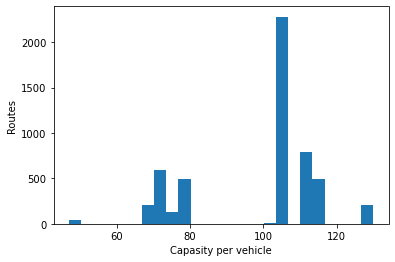

In [7]:
plot.hist(new_df.Kjøretøy_Kapasitet, bins=25, rwidth=1)
plot.xlabel('Capasity per vehicle')
plot.ylabel('Routes')
plot.show()

In [8]:
df = df[df.Passasjerer_Ombord>0]

<AxesSubplot:title={'center':'Passengers and capacity'}, xlabel='Kjøretøy_Kapasitet', ylabel='Passasjerer_Ombord'>

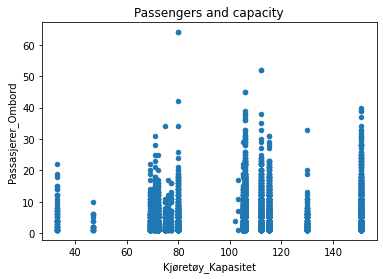

In [9]:
df.plot.scatter(x='Kjøretøy_Kapasitet', y='Passasjerer_Ombord', title='Passengers and capacity')

Text(0.5, 1.0, 'Passengers per day')

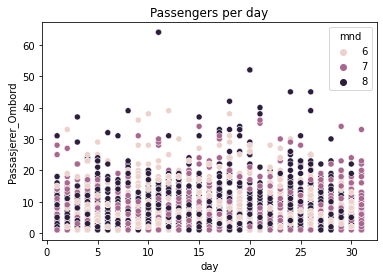

In [10]:
df = df[df.Passasjerer_Ombord>0]
df['Dato'] = panda.to_datetime(df['Dato'], dayfirst=True)
df['mnd'] = df['Dato'].dt.month
df['day'] = df['Dato'].dt.day
sns.scatterplot(data=df, y='Passasjerer_Ombord', x='day', hue='mnd').set_title('Passengers per day')

Text(0.5, 1.0, 'Correlation between the amount of passengers and time to leave stop')

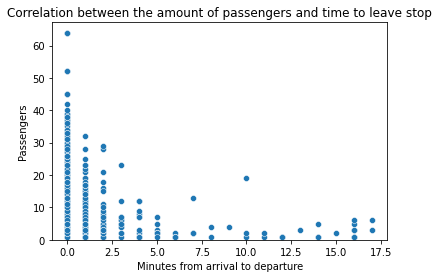

In [11]:
def my_to_datetime(date_str):
    h = date_str.split(':')
    if(h[0] != ""): 
        h[0] = int(h[0])
        if h[0] >= 24:
            date_str = str(h[0]-24)+':'+h[1]+':'+h[2]
            return panda.to_datetime(date_str, format='%H:%M:%S')
        return panda.to_datetime(date_str, format='%H:%M:%S')

df['arrival'] = df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].apply(my_to_datetime)
df['departure'] = df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'].apply(my_to_datetime)
df['timedelta'] = (df.departure - df.arrival).astype('timedelta64[m]')
g = sns.scatterplot(data=df, y='Passasjerer_Ombord', x='timedelta')
g.set(ylim=(0, None))
g.set_xlabel('Minutes from arrival to departure')
g.set_ylabel('Passengers')
g.set_title('Correlation between the amount of passengers and time to leave stop')